In [2]:
import glob
import os
import random
import sys


from functools import reduce
from typing import Dict

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt


In [4]:
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

from utils.npz_files import open_npz, open_npz_key, save_npz
from utils.features import compute_cwru_features
from utils.transform import extract_sequences

In [5]:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

#### Read and display data

In [6]:
normal_files_list = glob.glob("../Data/*/*_Normal.npz")
anommaly_files_list = [ item for item in glob.glob("../Data/*/*.npz") if item not in normal_files_list ]

In [7]:
print("number of normal files:", len(normal_files_list))
print(*normal_files_list, sep="\n")

number of normal files: 4
../Data/1750 RPM/1750_Normal.npz
../Data/1772 RPM/1772_Normal.npz
../Data/1797 RPM/1797_Normal.npz
../Data/1730 RPM/1730_Normal.npz


In [8]:
print("anomaly of normal files:", len(anommaly_files_list))
print(*anommaly_files_list, sep="\n")

anomaly of normal files: 157
../Data/1750 RPM/1750_IR_7_FE.npz
../Data/1750 RPM/1750_OR@3_7_DE12.npz
../Data/1750 RPM/1750_B_7_DE12.npz
../Data/1750 RPM/1750_B_21_DE12.npz
../Data/1750 RPM/1750_OR@6_7_FE.npz
../Data/1750 RPM/1750_OR@3_21_DE48.npz
../Data/1750 RPM/1750_IR_28_DE12.npz
../Data/1750 RPM/1750_B_21_FE.npz
../Data/1750 RPM/1750_OR@6_14_DE48.npz
../Data/1750 RPM/1750_OR@3_21_DE12.npz
../Data/1750 RPM/1750_B_28_DE12.npz
../Data/1750 RPM/1750_OR@12_7_FE.npz
../Data/1750 RPM/1750_IR_7_DE12.npz
../Data/1750 RPM/1750_OR@6_7_DE48.npz
../Data/1750 RPM/1750_OR@6_14_DE12.npz
../Data/1750 RPM/1750_OR@6_21_DE48.npz
../Data/1750 RPM/1750_IR_14_DE12.npz
../Data/1750 RPM/1750_B_21_DE48.npz
../Data/1750 RPM/1750_IR_21_FE.npz
../Data/1750 RPM/1750_B_14_DE48.npz
../Data/1750 RPM/1750_IR_14_FE.npz
../Data/1750 RPM/1750_OR@3_21_FE.npz
../Data/1750 RPM/1750_B_14_FE.npz
../Data/1750 RPM/1750_OR@6_21_DE12.npz
../Data/1750 RPM/1750_IR_14_DE48.npz
../Data/1750 RPM/1750_OR@6_7_DE12.npz
../Data/1750 RP

In [9]:
sample_normal_files = normal_files_list  # se seleccionan todos: 4
sample_anomaly_files = random.choices(anommaly_files_list, k=4)

In [10]:
def get_data(filepath : np.array, size_data : int = 512) -> Dict:
    data = open_npz(filepath)
    keys = list(data.keys())
    min_length = reduce(min, [data[k].shape[0] for k in keys])
    init_ind = random.randint(0, min_length - size_data)
    end_ind = init_ind + size_data
    return { k : data[k][init_ind : end_ind] for k in keys }

In [11]:
map_keys = {
    "DE" : "Drive end", 
    "FE" : "Fan end",
    "BA" : "Base engine",
}

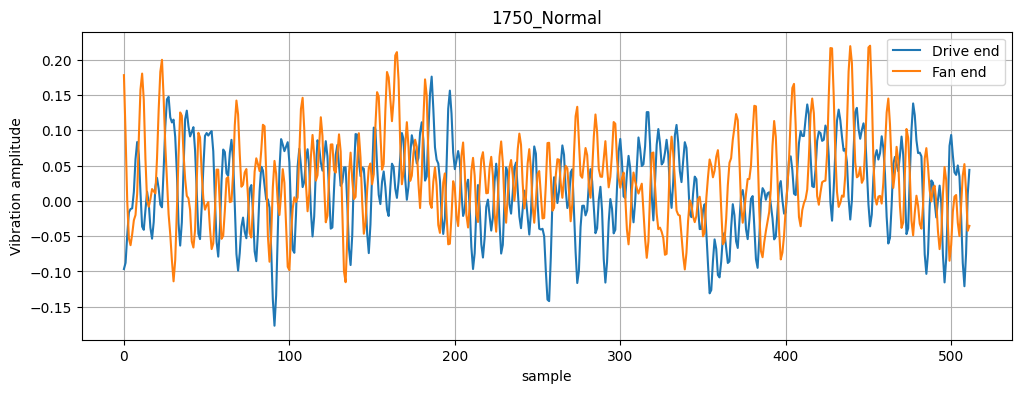

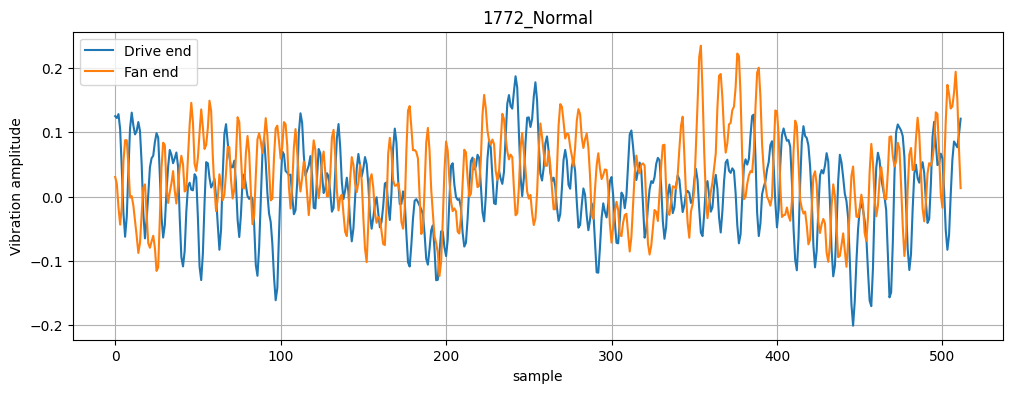

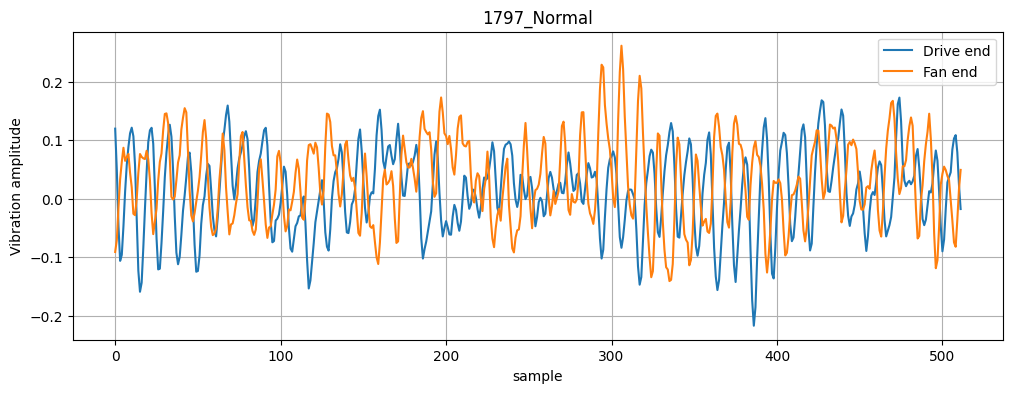

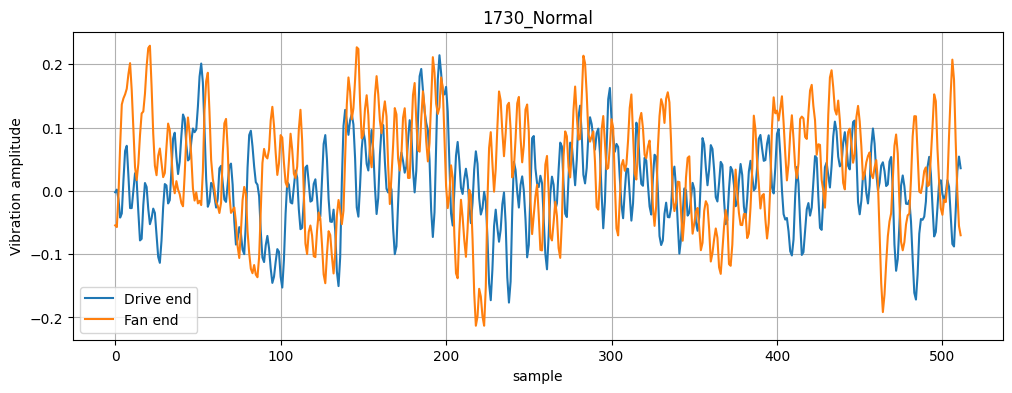

In [12]:
for filepath in sample_normal_files:
    data = get_data(filepath=filepath, size_data=512)
    plt.figure(figsize=(12,4))
    for k in data.keys():
        plt_data = data[k]
        plt.plot(plt_data, label=map_keys[k])
    title = os.path.splitext(os.path.basename(filepath))[0]
    plt.title(title)
    plt.xlabel("sample")
    plt.ylabel("Vibration amplitude")
    plt.grid(True)
    plt.legend()
    plt.show()

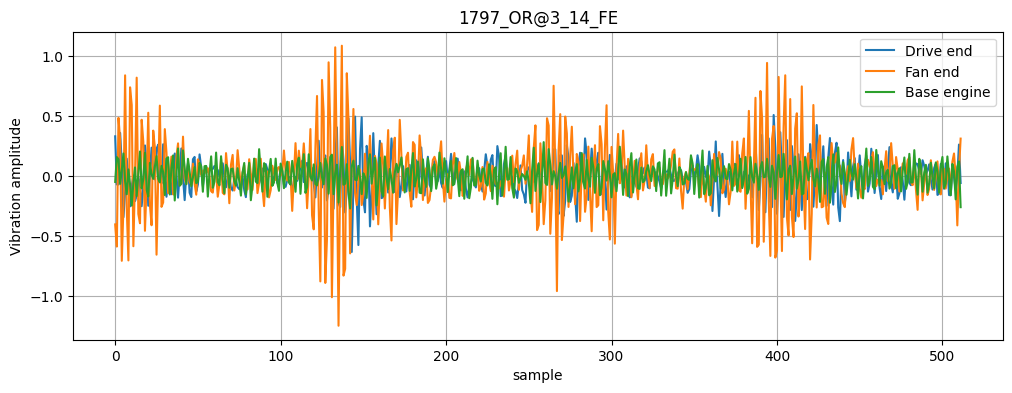

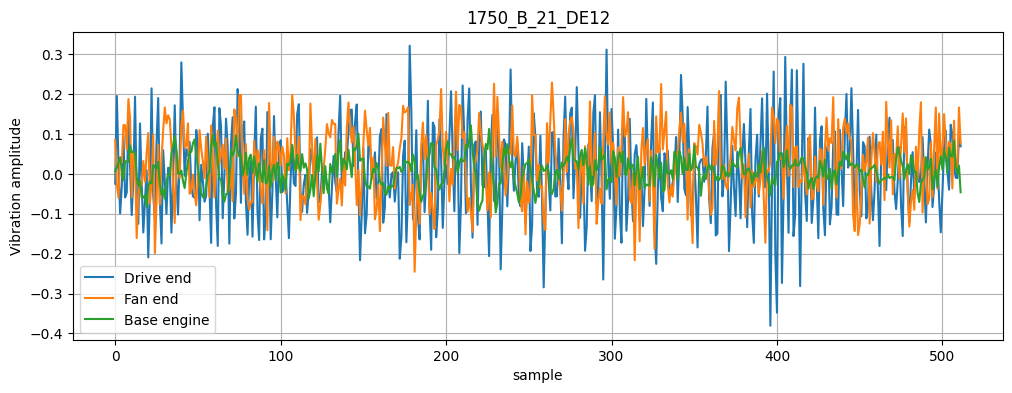

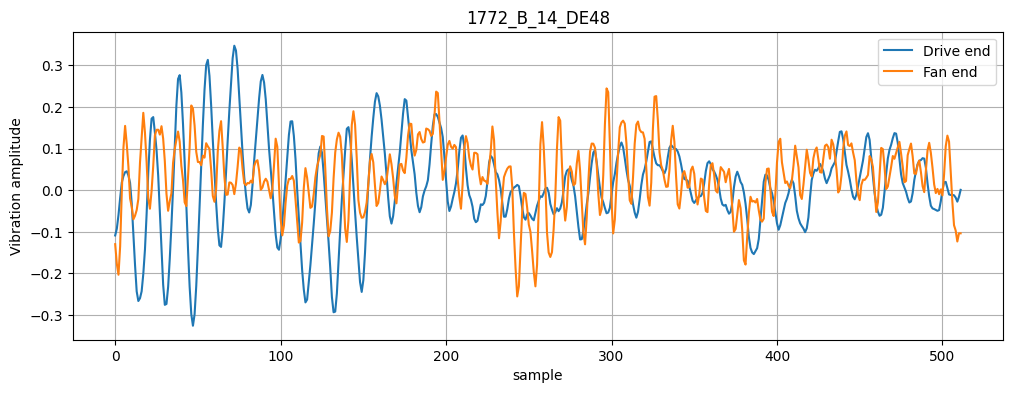

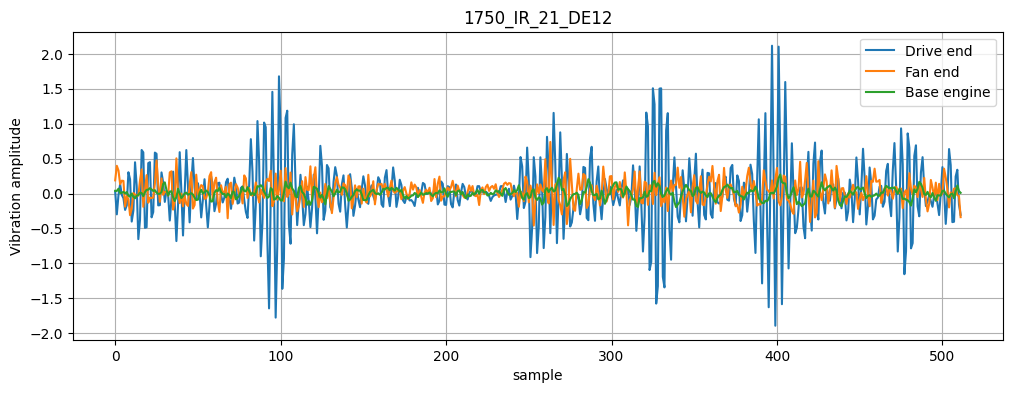

In [13]:
for filepath in sample_anomaly_files:
    data = get_data(filepath=filepath, size_data=512)
    plt.figure(figsize=(12,4))
    for k in data.keys():
        plt_data = data[k]
        plt.plot(plt_data, label=map_keys[k])
    title = os.path.splitext(os.path.basename(filepath))[0]
    plt.title(title)
    plt.xlabel("sample")
    plt.ylabel("Vibration amplitude")
    plt.grid(True)
    plt.legend()
    plt.show()

In [14]:
records_key_anomaly = []
for item in anommaly_files_list:
    data = open_npz(item)
    basefile = os.path.splitext(os.path.split(item)[1])[0]
    records_key_anomaly.append({
        "filename":  basefile,
        "DE": "DE" in data.keys(),
        "FE": "FE" in data.keys(),
        "BA": "BA" in data.keys(),
    })

df_key_anomaly = pd.DataFrame.from_records(records_key_anomaly)
df_key_anomaly.to_csv("../output/df_key_anomaly.csv", index=False)

df_key_anomaly


,filename,DE,FE,BA
0,1750_IR_7_FE,True,True,True
1,1750_OR@3_7_DE12,True,True,True
2,1750_B_7_DE12,True,True,True
3,1750_B_21_DE12,True,True,True
4,1750_OR@6_7_FE,True,True,True
...,...,...,...,...
152,1730_B_21_DE48,True,True,False
153,1730_OR@3_21_DE48,True,True,False
154,1730_IR_14_DE48,True,True,False
155,1730_OR@12_7_DE12,True,True,True


In [15]:
print("number of rows", df_key_anomaly.shape[0])
print("number of DE", df_key_anomaly['DE'].sum())
print("number of FE", df_key_anomaly['FE'].sum())
print("number of BA", df_key_anomaly['BA'].sum())

number of rows 157
number of DE 157
number of FE 149
number of BA 97


####  genrate full dataframe

In [16]:
from tqdm import tqdm

In [17]:
def generate_record(time_series):
    record = {
        "length": time_series.shape[0],
        "maximum": np.max(time_series),
        "minimum": np.min(time_series),
        "mean": np.mean(time_series),
        "std": np.std(time_series),
    }
    return record

In [18]:
records_anomaly_data = []
for item in tqdm(normal_files_list + anommaly_files_list):

    base, ext = os.path.splitext(os.path.split(item)[1])
    # print(item, base, ext)
    
    classification_labels = base.split('_')
    is_normal = len(classification_labels) == 2

    rpm_label = int(classification_labels[0])
    anomaly_type = np.nan if is_normal else classification_labels[1]
    diameter_fault = np.nan if is_normal else int(classification_labels[2])
    sampling_value = np.nan if is_normal else \
            (12 if classification_labels[3] == 'FE' or '12' in classification_labels[3] else 48)
    sampling_label = np.nan if is_normal else classification_labels[3][:3]
    
    data = open_npz(item)
    for k in data.keys():
        df = generate_record(data[k])
        df["rpm"] = rpm_label
        df["anomaly_type"] = anomaly_type
        df["diameter_fault"] = diameter_fault
        df["sampling_value"] = sampling_value
        df["sampling_label"] = sampling_label
        df["accelerometer"] = k
        df["anomaly"] = not is_normal
        records_anomaly_data.append(df)

df_records_anomaly_data = pd.DataFrame.from_records(records_anomaly_data)

  0%|          | 0/161 [00:00<?, ?it/s]

100%|██████████| 161/161 [00:01<00:00, 104.36it/s]


In [19]:
df_records_anomaly_data.to_csv("../output/df_records_anomaly_data.csv", index=False)
df_records_anomaly_data

,length,maximum,minimum,mean,std,rpm,anomaly_type,diameter_fault,sampling_value,sampling_label,accelerometer,anomaly
0,485063,0.359236,-0.326900,0.012261,0.063146,1750,NaN,NaN,NaN,NaN,DE,False
1,485063,0.311675,-0.244285,0.031962,0.065078,1750,NaN,NaN,NaN,NaN,FE,False
2,483903,0.317513,-0.345884,0.012564,0.065152,1772,NaN,NaN,NaN,NaN,DE,False
3,483903,0.321947,-0.218193,0.032375,0.067346,1772,NaN,NaN,NaN,NaN,FE,False
4,243938,0.311254,-0.286638,0.012558,0.072687,1797,NaN,NaN,NaN,NaN,DE,False
...,...,...,...,...,...,...,...,...,...,...,...,...
406,122136,1.686402,-1.907151,0.003791,0.256169,1730,OR@12,7.0,12.0,DE1,DE,True
407,122136,1.121371,-1.021931,0.033056,0.139862,1730,OR@12,7.0,12.0,DE1,FE,True
408,122136,0.224726,-0.205935,0.005299,0.044717,1730,OR@12,7.0,12.0,DE1,BA,True
409,489125,7.559576,-7.019547,0.014169,0.590562,1730,OR@6,21.0,48.0,DE4,DE,True


In [20]:
TARGET_COLUMN = "anomaly"
NUMERIC_COLUMN = [
    "length",
    "maximum",
    "minimum",
    "mean",
    "std",
    "rpm"
]

In [21]:
df_records_anomaly_data[NUMERIC_COLUMN].describe().to_csv("../output/df_records_anomaly_data_describe.csv")
df_records_anomaly_data[NUMERIC_COLUMN].describe()

,length,maximum,minimum,mean,std,rpm
count,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000
mean,200992.328467,1.599175,-1.510600,0.018382,0.242951,1762.503650
std,146098.174713,1.756701,1.629697,0.035327,0.268967,25.078255
min,63788.000000,0.131295,-10.091934,0.000233,0.030392,1730.000000
25%,121351.000000,0.483574,-1.910461,0.005059,0.101308,1750.000000
50%,121991.000000,0.975585,-0.931565,0.006739,0.151743,1772.000000
75%,130549.000000,2.016169,-0.468224,0.030698,0.258601,1797.000000
max,491446.000000,11.673961,-0.114998,0.396054,2.145689,1797.000000


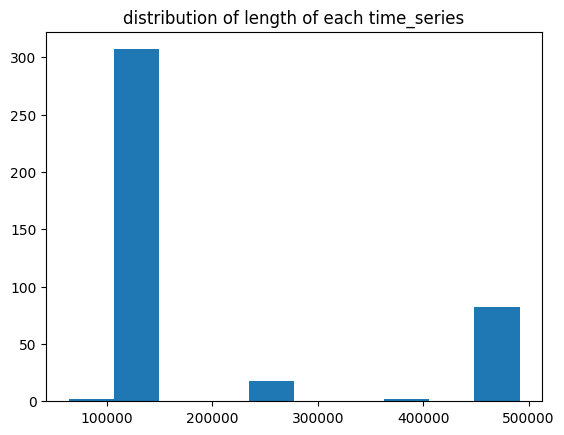

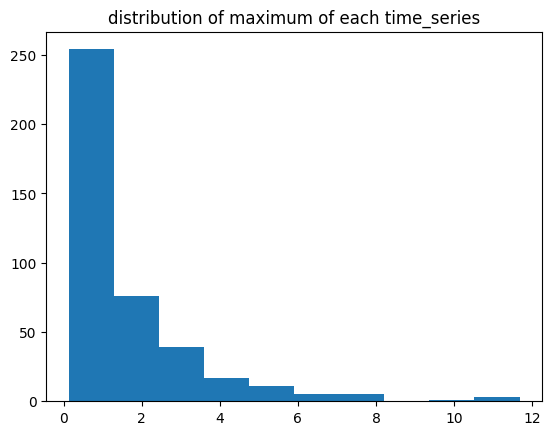

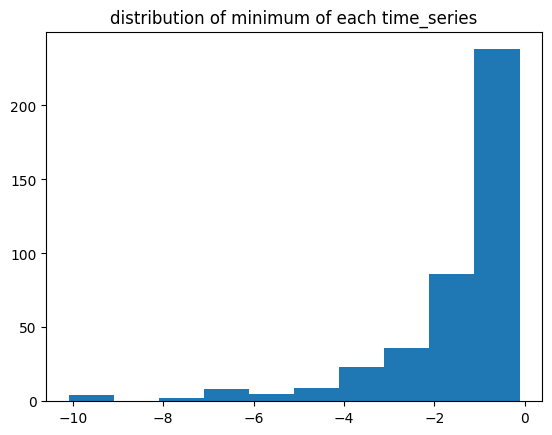

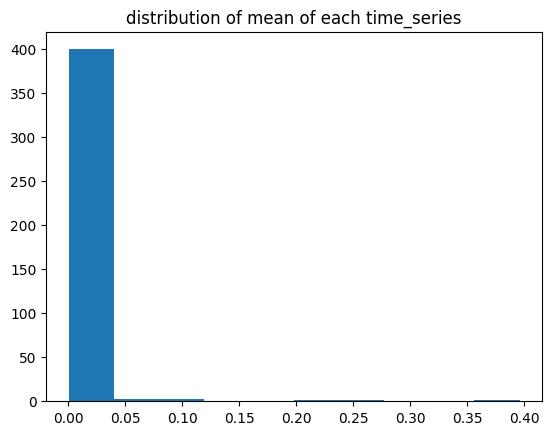

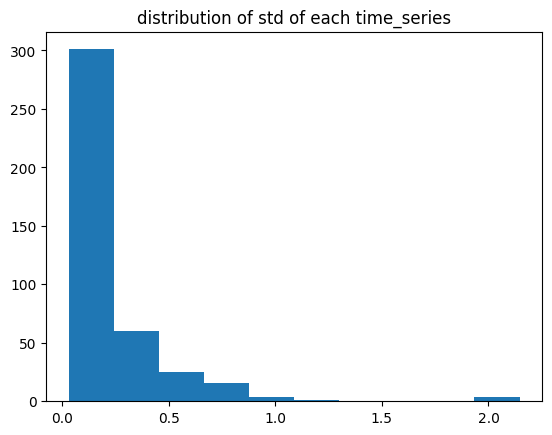

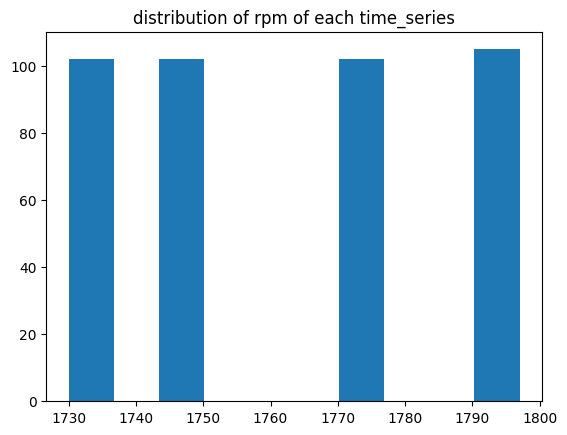

In [22]:
for item in NUMERIC_COLUMN:
    plt.figure()
    plt.hist(df_records_anomaly_data[item])
    plt.title(f"distribution of {item} of each time_series")
    plt.show()

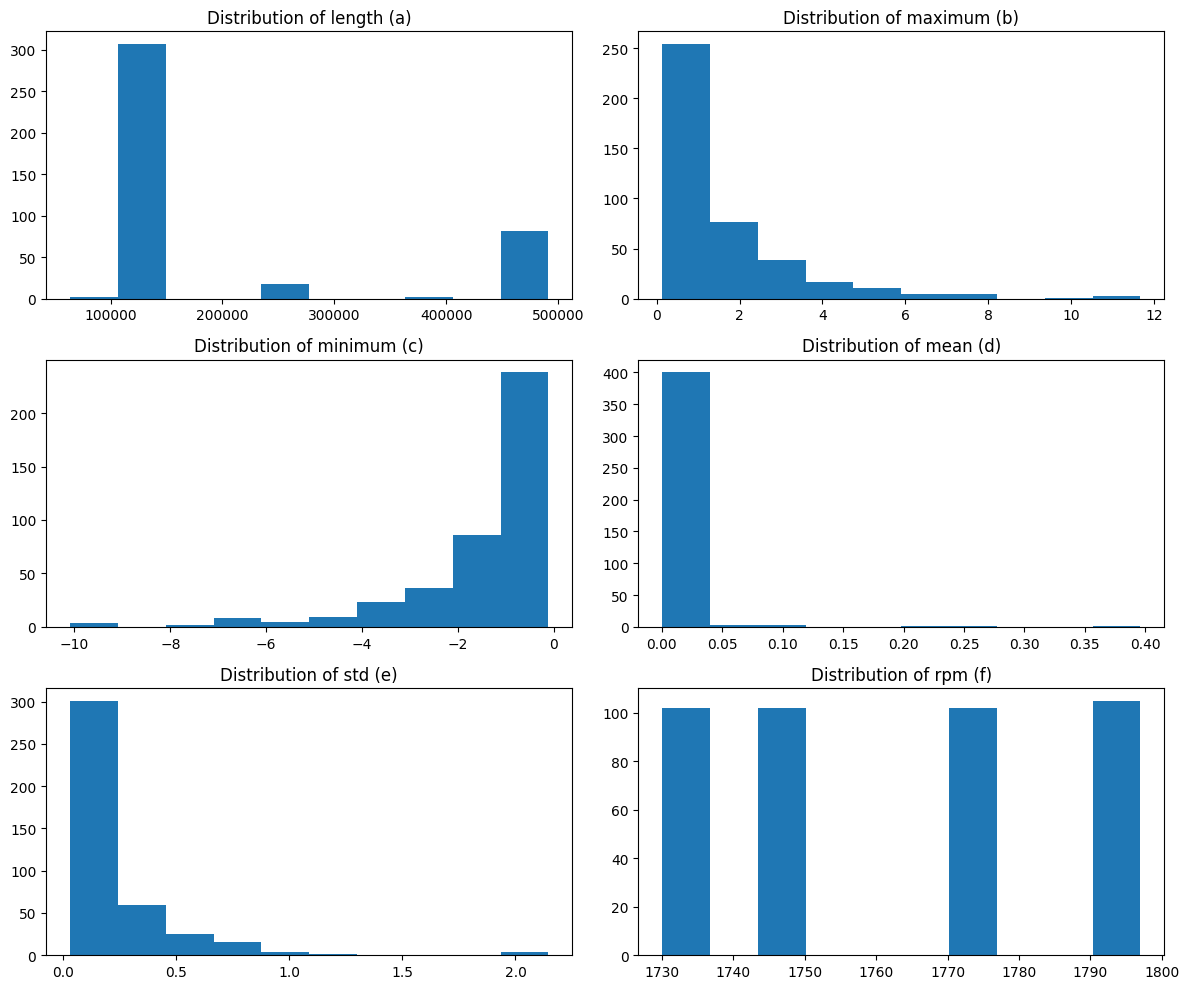

In [33]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))  # 2 filas x 3 columnas
axes = axes.flatten()  # lo paso a array 1D para iterar fácilmente

from string import ascii_lowercase

for i, item in enumerate(NUMERIC_COLUMN[:6]):  # asegúrate que hay ≤6 columnas
    axes[i].hist(df_records_anomaly_data[item])
    axes[i].set_title(f"Distribution of {item} ({ascii_lowercase[i]})")

plt.tight_layout()  # ajusta para que no se solapen títulos y ejes
plt.show()


In [23]:
df_records_anomaly_data["log_mean"] = np.log1p(df_records_anomaly_data["mean"])
df_records_anomaly_data["log_std"]  = np.log1p(df_records_anomaly_data["std"])
df_records_anomaly_data["log_maximum"]  = np.log1p(df_records_anomaly_data["maximum"])
df_records_anomaly_data["log_minimum"]  = -1 * np.log1p(np.abs(df_records_anomaly_data["minimum"]))


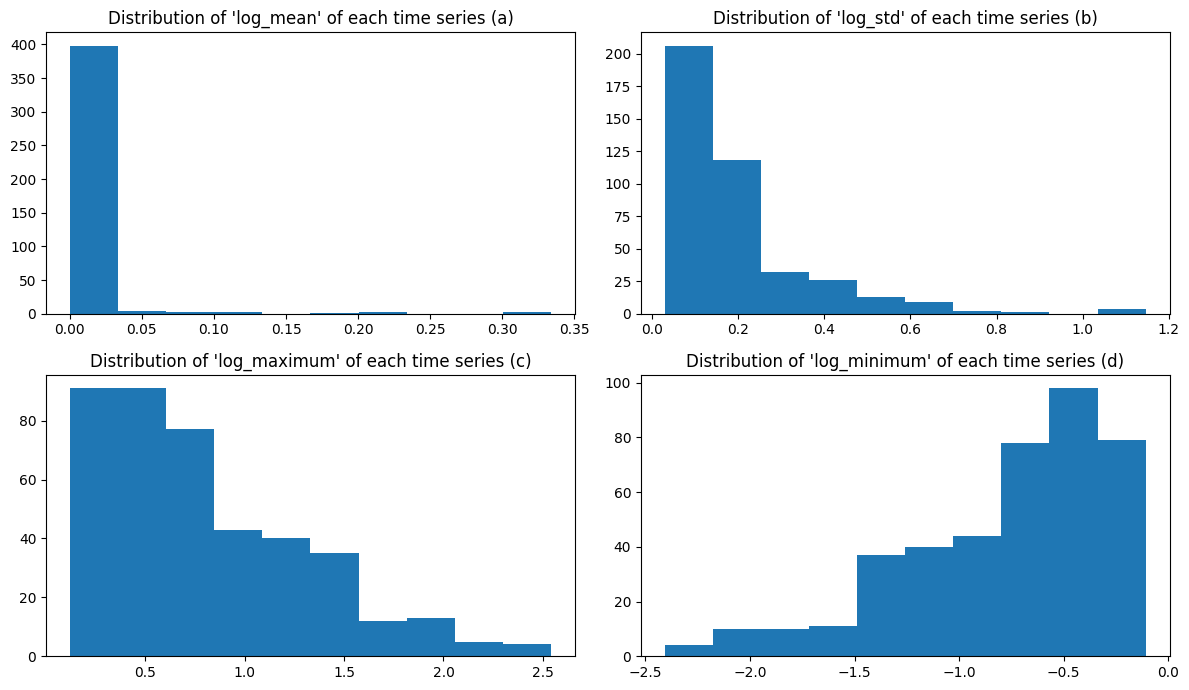

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(12, 7))  # 2 filas x 3 columnas
axes = axes.flatten()  # lo paso a array 1D para iterar fácilmente

from string import ascii_lowercase
new_numeric_columns = ["log_mean", "log_std", "log_maximum", "log_minimum"]

for i, item in enumerate(new_numeric_columns[:6]):  # asegúrate que hay ≤6 columnas
    axes[i].hist(df_records_anomaly_data[item])
    axes[i].set_title(f"Distribution of '{item}' of each time series ({ascii_lowercase[i]})")

plt.tight_layout()  # ajusta para que no se solapen títulos y ejes
plt.show()

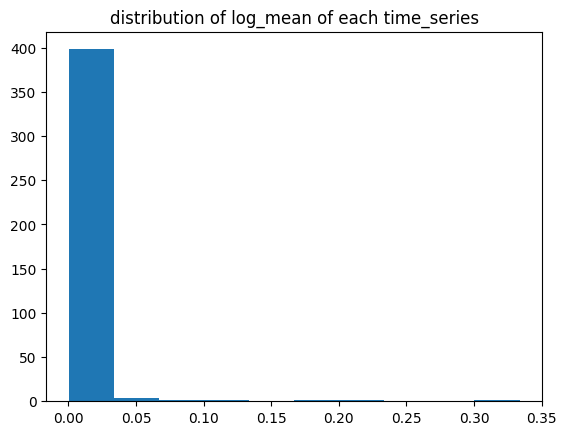

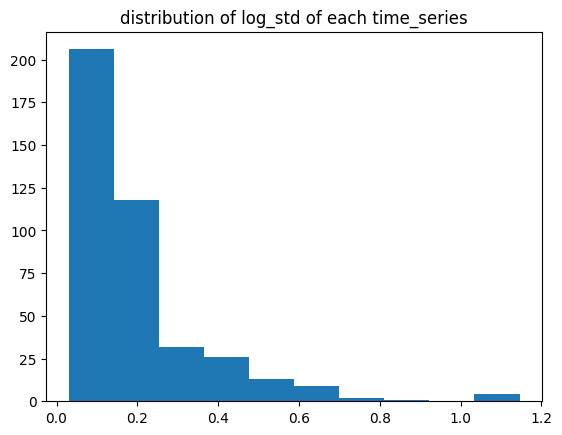

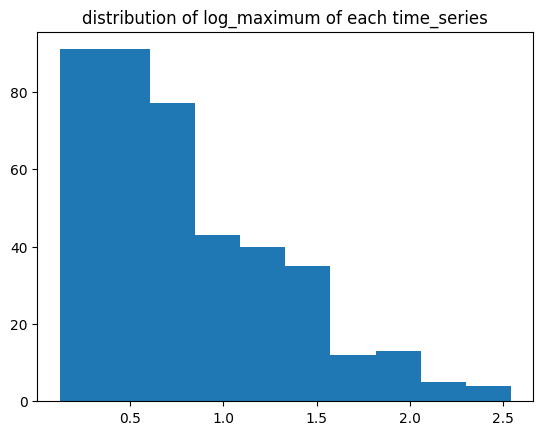

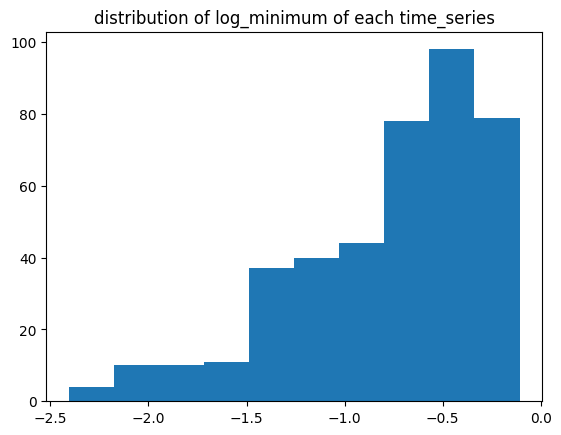

In [24]:
new_numeric_columns = ["log_mean", "log_std", "log_maximum", "log_minimum"]
for item in new_numeric_columns:
    plt.figure()
    plt.hist(df_records_anomaly_data[item])
    plt.title(f"distribution of {item} of each time_series")
    plt.show()

<Axes: >

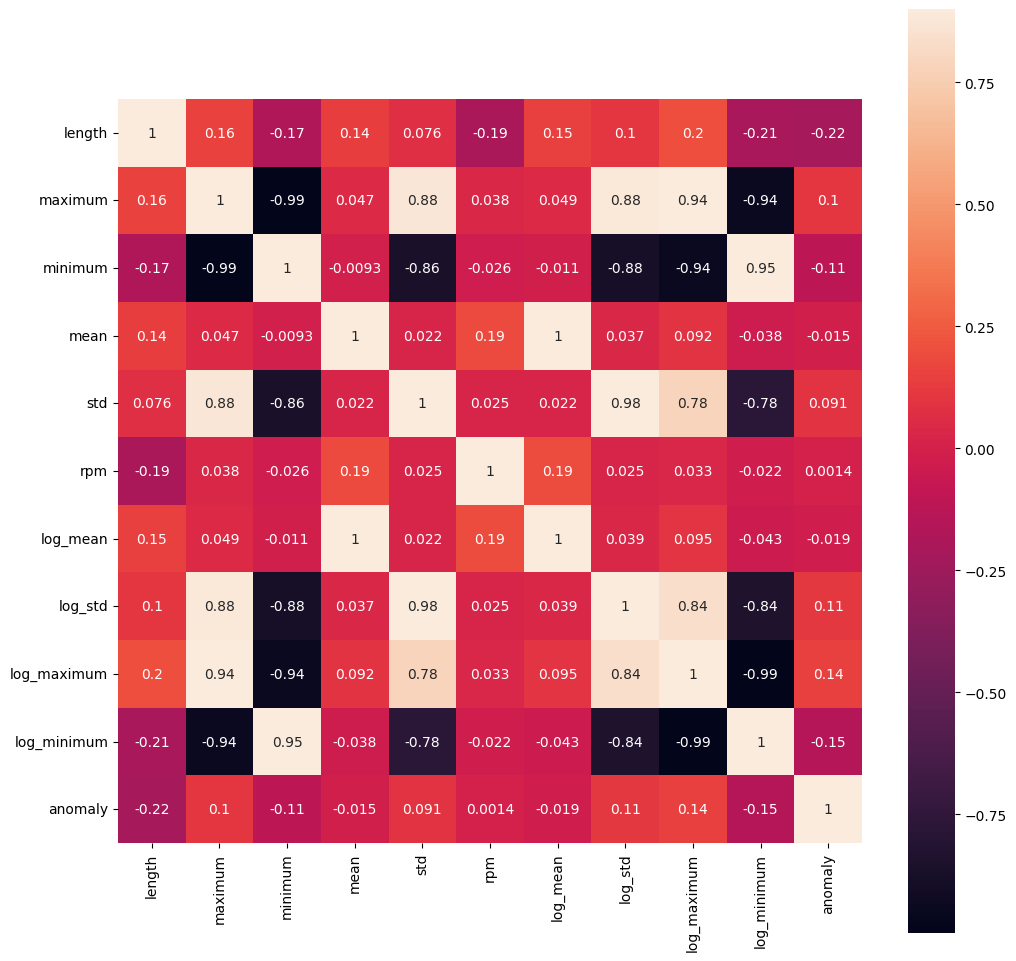

In [25]:
all_numeric_columns = NUMERIC_COLUMN + new_numeric_columns + [TARGET_COLUMN]
corrmat = df_records_anomaly_data[all_numeric_columns].corr()
plt.subplots(figsize=(12,12))
sns.heatmap(corrmat, vmax=0.9, square=True, annot=True)

In [37]:
print(corrmat)

               length   maximum   minimum      mean       std       rpm  \
length       1.000000  0.155808 -0.167865  0.135645  0.075869 -0.193752   
maximum      0.155808  1.000000 -0.992804  0.047434  0.875581  0.038317   
minimum     -0.167865 -0.992804  1.000000 -0.009284 -0.864695 -0.025783   
mean         0.135645  0.047434 -0.009284  1.000000  0.021731  0.188856   
std          0.075869  0.875581 -0.864695  0.021731  1.000000  0.024697   
rpm         -0.193752  0.038317 -0.025783  0.188856  0.024697  1.000000   
log_mean     0.149912  0.048729 -0.011174  0.998384  0.022298  0.191863   
log_std      0.103741  0.884224 -0.878983  0.037149  0.981804  0.025031   
log_maximum  0.203799  0.943282 -0.942386  0.092332  0.783730  0.032699   
log_minimum -0.205940 -0.935983  0.948626 -0.038435 -0.780500 -0.021781   
anomaly     -0.215941  0.101840 -0.106132 -0.015172  0.091231  0.001427   

             log_mean   log_std  log_maximum  log_minimum   anomaly  
length       0.149912  0.1037

<Axes: title={'center': 'Correlation between anomaly and other attributes'}>

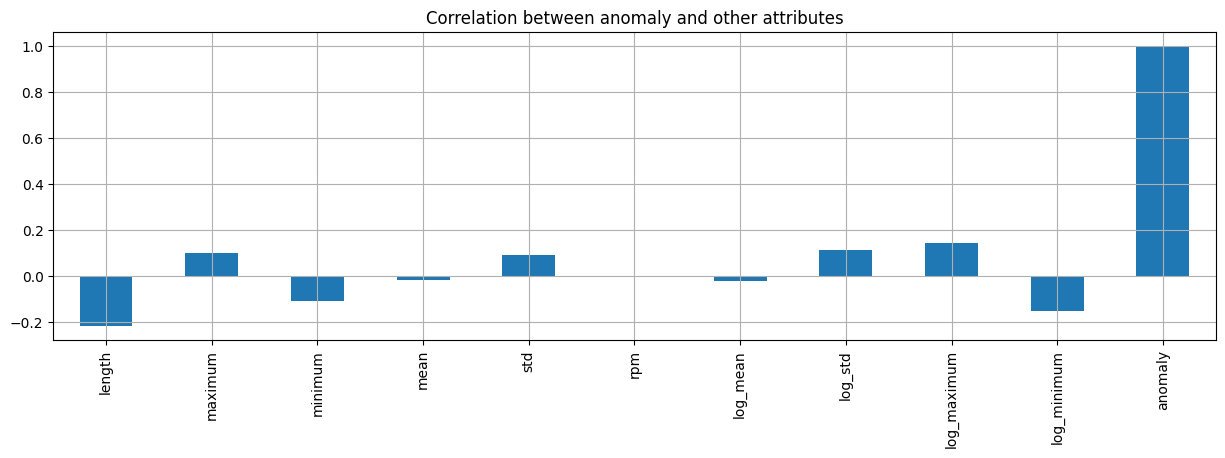

In [26]:
corrmat[TARGET_COLUMN].plot(
    kind='bar',
    figsize=(15,4),
    title=f'Correlation between {TARGET_COLUMN} and other attributes',
    grid=True
)